In [1]:
import pandas
import matplotlib.pyplot

import espn_fantasy_rugby.points_predictor as predictor
import espn_fantasy_rugby.team_selector as selector

In [20]:
tournament_round = 5

features = ['OPP', 'POS']
target = 'MDP'

pos_thresholds = {
    'OB': 3,
    'C': 2,
    'FH': 1,
    'SH': 1,
    'BR': 3,
    'SR': 2,
    'FR': 3
}

espn_data = pandas.concat(
    pandas.read_excel(
        '../data/espn_rugby_data.xlsx',
        sheet_name=None
    ),
    ignore_index=True
)

In [21]:
player_forecasts = predictor.get_results(espn_data, features, target, tournament_round)
player_forecasts.head()

,NAME,TEAM,OPP,POS,RATING,2018,SM,SUB,T,A,...,RC,MOM,5T,50M,LO,TSB,PTS,MDP,ROUND,PREDICTION
0,F Russell,SCO,ENG,FH,5,32,1,0,1,1,...,0,1,1,1,0,0.14,40,19,5,6.0
1,G Anscombe,WAL,IRE,OB,4,15,1,0,0,1,...,0,1,0,0,0,0.01,40,17,5,5.0
2,D Penaud,FRA,ITA,C,4,0,1,0,1,1,...,0,0,2,1,0,0.06,28,13,5,6.0
3,S McInally,SCO,ENG,FR,4,0,1,0,1,0,...,0,0,2,1,0,0.20,30,13,5,4.0
4,D Graham,SCO,ENG,OB,3,0,1,0,2,0,...,0,0,1,0,0,0.00,23,13,5,4.0


In [22]:
prob = selector.create_team_selection_problem(player_forecasts)
prob = selector.add_nationality_constraint(prob, player_forecasts, threshold=3)
prob = selector.add_position_constraint(prob, player_forecasts, pos_caps=pos_thresholds)
team = selector.get_team(prob, player_forecasts)

In [23]:
predicted_points = selector.get_predicted_team_points(prob)
actual_points = selector.get_actual_team_points(team)

In [24]:
print('Predicted points = {}'.format(predicted_points))
print('Actual points = {}'.format(actual_points))

Predicted points = 95.0
Actual points = 58


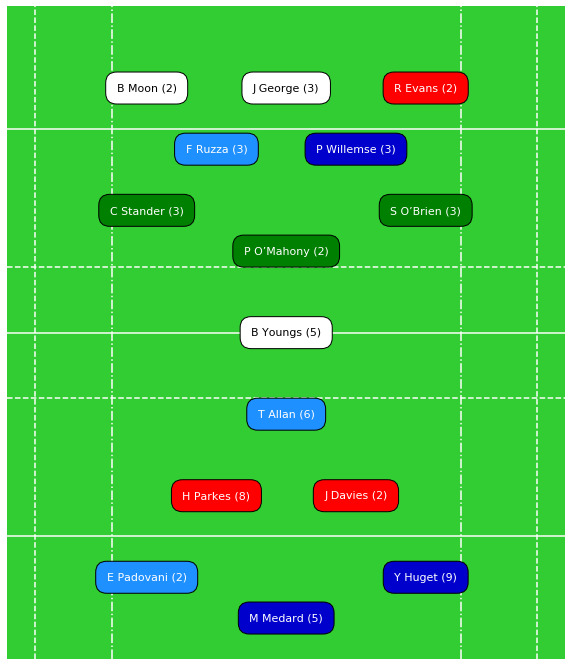

In [25]:
fig, ax = matplotlib.pyplot.subplots(figsize=(10,12))
selector.show_team(team, ax)
matplotlib.pyplot.show()